In [1]:
import compnal
import scipy.special
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
N = 10
deg = 3
T_list = np.arange(1, 1.1, 0.2)
val = -1.0/scipy.special.binom(N - 1, deg - 1)
lattice = compnal.lattice.InfiniteRange(N, boundary_condition=compnal.lattice.BoundaryCondition.OBC)
model = compnal.model.make_polynomial_ising(lattice, {deg: -val})
cmc = compnal.solver.ClassicalMonteCarlo(model)
cmc.num_sweeps = 50000
cmc.num_samples = 50000
cmc.num_threads = 10

TypeError: __init__() got an unexpected keyword argument 'boundary_condition'

In [3]:
spin_list= []
mag = []
for T in tqdm(T_list):
    cmc.set_temperature(T)
    cmc.run()
    mag.append(cmc.calculate_sample_average())
    spin_list.append(cmc.get_samples())

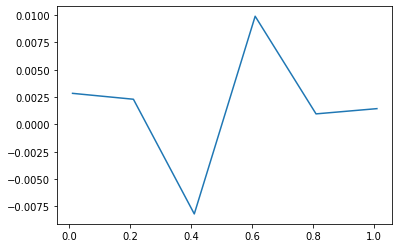

In [ ]:
plt.plot(T_list, mag)